##Bring in libraries and dataframes and set indexes

In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
%matplotlib inline

In [2]:
#Read in data calibrated VWC data
Data = pd.read_pickle('.\DataFrames\LysoDrainage_df')

## Set time slice to graph

In [3]:
from datetime import timedelta #Import function needed for doing date deltas 
EndDate = Data.index.max()  #Set end of series as most recent date in file
EndDateString = EndDate.strftime("%Y-%m-%d")  #Turn this to a string
PlotDuration = 1
#Set the duration that you want to graph for
StartDate = EndDate - timedelta(weeks=PlotDuration)       #Set start date the specified duration before the end date 
StartDateString = StartDate.strftime("%Y-%m-%d")           #Turn that into a string
EndDate

Timestamp('2016-02-01 09:45:00')

In [4]:
StartDateString

'2016-01-25'

##Graph all sensors to check for anomolies

C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:475: UserWarning:

No labelled objects found. Use label='...' kwarg on individual plots.



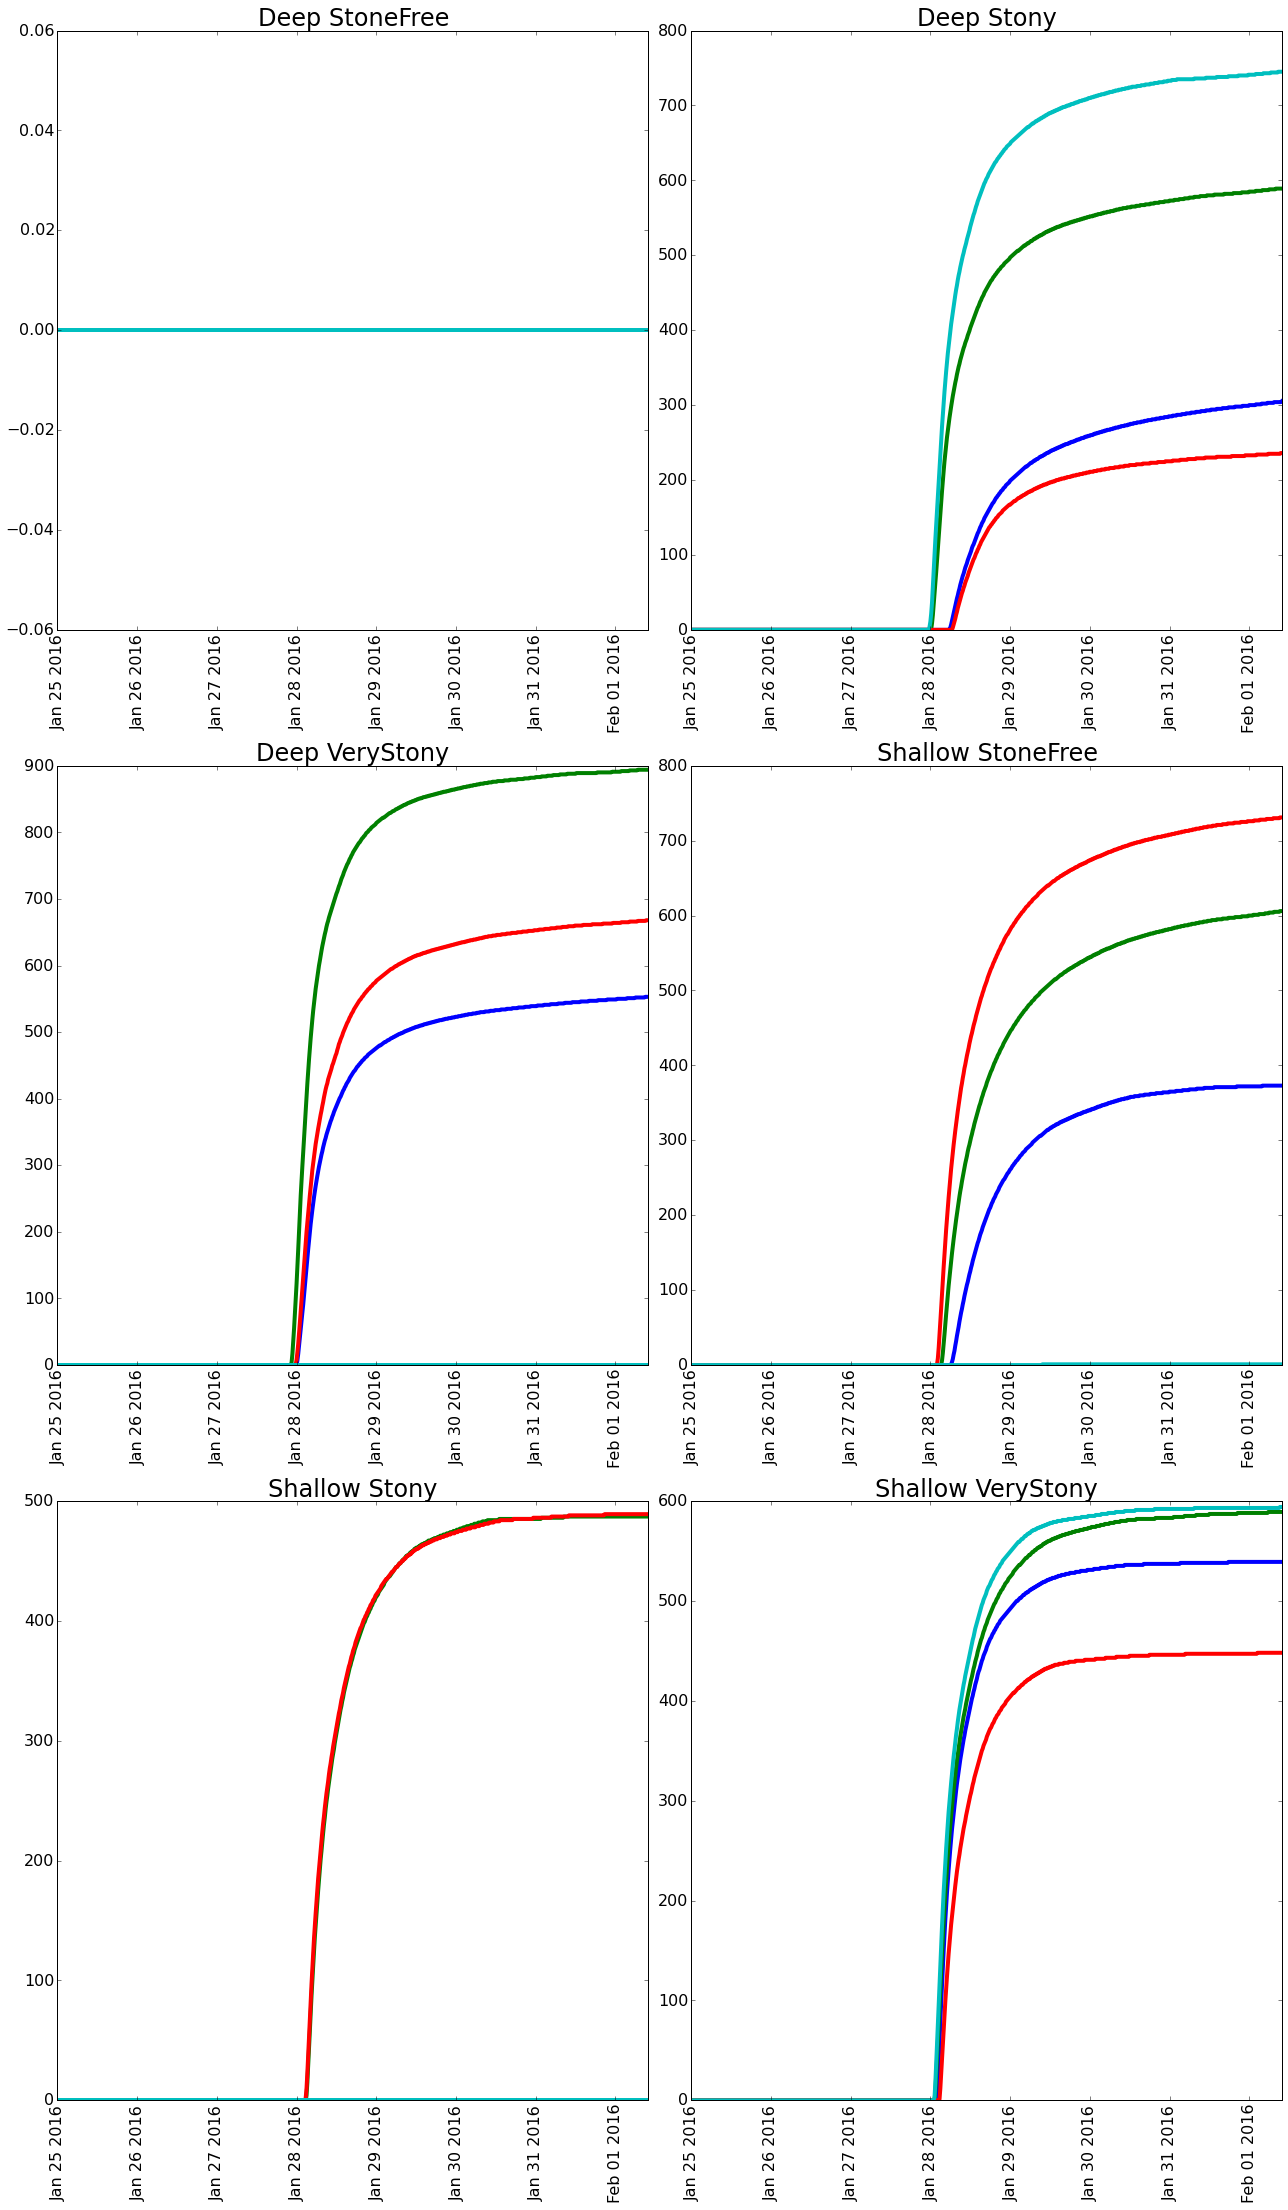

In [5]:
AccumData = Data.ix[StartDateString:,:].cumsum()
#AccumData.ix[:,('Deep','StoneFree')]
Fig = plt.figure(figsize=(18, 60))

Fig.add_subplot(6,2,1)
plt.title('Deep StoneFree', fontsize=24);
plt.plot(AccumData.index,AccumData.ix[:,('Deep','StoneFree')], linewidth = 4);
plt.tick_params(labelsize=16);
plt.xticks(rotation=90)
Fig.add_subplot(6,2,2)
plt.title('Deep Stony', fontsize=24);
plt.plot(AccumData.index,AccumData.ix[:,('Deep','Stony')], linewidth = 4);
plt.tick_params(labelsize=16);
plt.xticks(rotation=90)
Fig.add_subplot(6,2,3)
plt.title('Deep VeryStony', fontsize=24);
plt.plot(AccumData.index,AccumData.ix[:,('Deep','VeryStony')], linewidth = 4);
plt.tick_params(labelsize=16);
plt.xticks(rotation=90)
Fig.add_subplot(6,2,4)
plt.title('Shallow StoneFree', fontsize=24);
plt.plot(AccumData.index,AccumData.ix[:,('Shallow','StoneFree')], linewidth = 4);
plt.tick_params(labelsize=16);
plt.xticks(rotation=90)
Fig.add_subplot(6,2,5)
plt.title('Shallow Stony', fontsize=24);
plt.plot(AccumData.index,AccumData.ix[:,('Shallow','Stony')], linewidth = 4);
plt.tick_params(labelsize=16);
plt.xticks(rotation=90)
Fig.add_subplot(6,2,6)
plt.title('Shallow VeryStony', fontsize=24);
plt.plot(AccumData.index,AccumData.ix[:,('Shallow','VeryStony')], linewidth = 4);
plt.tick_params(labelsize=16);
plt.legend(loc=1, fontsize=13, ncol=2)
plt.tick_params(labelsize=16);
plt.xticks(rotation=90)

Fig.tight_layout()

## Look at the treatment means over time

In [6]:
 Data.groupby(level=['Gravels','Stones'],axis=1).mean()

Gravels                  Deep                   Shallow                
Stones              StoneFree Stony VeryStony StoneFree Stony VeryStony
2015-06-19 16:15:00  3.666667  3.00      3.00  4.333333  2.00      3.50
2015-06-19 16:30:00  4.000000  2.75      3.00  4.500000  2.75      3.25
2015-06-19 16:45:00  3.750000  3.00      2.50  4.250000  2.75      3.50
2015-06-19 17:00:00  3.250000  2.75      2.75  4.250000  2.50      3.00
2015-06-19 17:15:00  3.750000  2.75      2.50  3.750000  2.75      3.25
2015-06-19 17:30:00  3.250000  2.50      2.50  4.000000  2.25      3.00
2015-06-19 17:45:00  3.250000  2.75      2.50  4.000000  2.50      3.00
2015-06-19 18:00:00  3.250000  2.00      2.25  4.000000  2.50      2.25
2015-06-19 18:15:00  3.250000  3.00      2.00  3.250000  2.50      2.75
2015-06-19 18:30:00  3.000000  2.00      2.50  4.000000  2.00      3.00
2015-06-19 18:45:00  2.750000  2.00      2.00  3.250000  2.25      2.25
2015-06-19 19:00:00  2.750000  2.50      2.00  3.250000  2.25      2.75
2015-06-19 19:15:00  3.000000  2.00      2.00  3.750000  2.00      2.25
2015-06-19 19:30:00  2.500000  2.00      2.00  3.000000  1.75      2.25
2015-06-19 19:45:00  2.750000  2.00      2.25  3.500000  2.00      2.25
2015-06-19 20:00:00  2.750000  2.00      2.00  3.000000  2.00      2.50
2015-06-19 20:15:00  2.500000  1.50      1.50  3.000000  1.75      2.00
2015-06-19 20:30:00  2.250000  2.00      2.00  3.000000  2.00      2.00
2015-06-19 20:45:00  2.750000  2.00      1.75  2.500000  1.75      2.25
2015-06-19 21:00:00  2.000000  1.50      1.75  2.750000  1.75      2.00
2015-06-19 21:15:00  2.250000  2.00      1.75  3.000000  1.75      2.00
2015-06-19 21:30:00  2.500000  1.75      1.50  2.750000  1.50      2.00
2015-06-19 21:45:00  2.250000  1.25      1.75  2.500000  1.75      2.00
2015-06-19 22:00:00  2.000000  1.75      1.50  2.500000  1.50      1.75
2015-06-19 22:15:00  2.000000  1.50      1.75  2.500000  1.50      1.50
2015-06-19 22:30:00  2.000000  1.25      1.00  2.750000  1.50      1.75
2015-06-19 22:45:00  2.000000  1.75      1.75  2.000000  1.50      2.00
2015-06-19 23:00:00  1.750000  1.50      1.00  2.500000  1.50      1.50
2015-06-19 23:15:00  2.000000  1.25      2.00  2.500000  1.50      1.75
2015-06-19 23:30:00  2.000000  1.75      1.00  2.000000  1.50      1.25
...                       ...   ...       ...       ...   ...       ...
2016-02-01 02:30:00  0.000000  0.00      0.00  0.000000  0.00      0.25
2016-02-01 02:45:00  0.000000  0.00      0.00  0.000000  0.00      0.00
2016-02-01 03:00:00  0.000000  0.00      0.00  0.250000  0.00      0.00
2016-02-01 03:15:00  0.000000  0.00      0.00  0.250000  0.00      0.00
2016-02-01 03:30:00  0.000000  0.00      0.25  0.000000  0.00      0.00
2016-02-01 03:45:00  0.000000  0.25      0.00  0.000000  0.00      0.00
2016-02-01 04:00:00  0.000000  0.25      0.00  0.250000  0.00      0.00
2016-02-01 04:15:00  0.000000  0.25      0.50  0.000000  0.00      0.00
2016-02-01 04:30:00  0.000000  0.00      0.00  0.000000  0.00      0.00
2016-02-01 04:45:00  0.000000  0.00      0.00  0.250000  0.00      0.00
2016-02-01 05:00:00  0.000000  0.00      0.00  0.000000  0.00      0.00
2016-02-01 05:15:00  0.000000  0.00      0.00  0.250000  0.00      0.00
2016-02-01 05:30:00  0.000000  0.25      0.00  0.000000  0.00      0.00
2016-02-01 05:45:00  0.000000  0.25      0.00  0.000000  0.00      0.25
2016-02-01 06:00:00  0.000000  0.25      0.25  0.250000  0.00      0.00
2016-02-01 06:15:00  0.000000  0.00      0.00  0.000000  0.00      0.00
2016-02-01 06:30:00  0.000000  0.25      0.00  0.000000  0.00      0.00
2016-02-01 06:45:00  0.000000  0.00      0.50  0.000000  0.00      0.00
2016-02-01 07:00:00  0.000000  0.00      0.00  0.000000  0.00      0.00
2016-02-01 07:15:00  0.000000  0.00      0.00  0.250000  0.00      0.00
2016-02-01 07:30:00  0.000000  0.25      0.00  0.250000  0.00      0.00
2016-02-01 07:45:00  0.000000  0.00      0.00  0.000000  0.00      0.00
2016-02-01 08:00:00  0.000000  0.25     

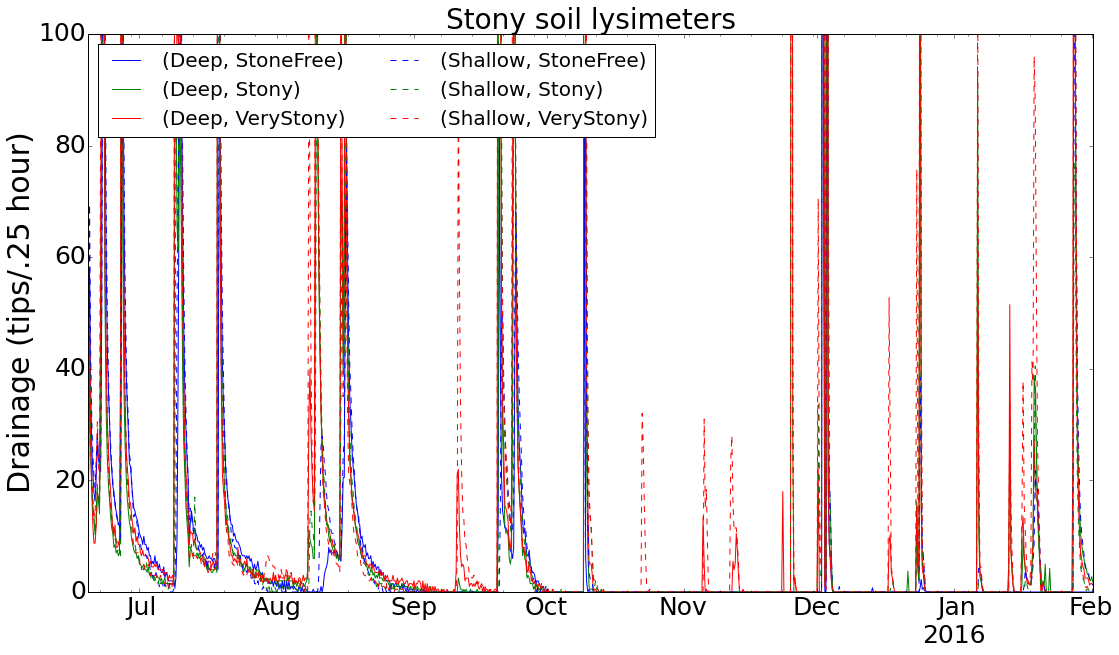

In [7]:
#Calculate treatment means omitting data prior to 2014-11-05 08:00:00 to avoid NaN values
DataMeans =  Data.groupby(level=['Gravels','Stones'],axis=1).mean()
#DataMeans =  DataMeans.dropna(axis=1) #For some reason it keeps non valid combinations in so need to extract with this function

AccumDrain = DataMeans.resample('6h', how='sum')#.cumsum()
                
AccumDrain['2015-04-26':].plot(figsize=(18,10),style=['b-','g-','r-','b--','g--','r--'],ylim=(0,100))
plt.ylabel('Drainage (tips/.25 hour)', fontsize=30);
plt.tick_params(labelsize=25)
plt.title('Stony soil lysimeters', fontsize=28)
plt.legend(fontsize = 20, loc=2, ncol=2)

In [8]:

##Graph treatment means by layer

In [9]:
#!gist -p -d "Setting up Soil summary for Export" SoilWaterAnalysis.ipynb

In [10]:
!gist -u https://gist.github.com/604c4dfd746733297790 SoilWaterAnalysis.ipynb

https://gist.github.com/604c4dfd746733297790


In [11]:
from plotly.graph_objs import *

DeepStoneFree = Scatter(x=AccumDrain['2015-04-26':].index,
                        y=AccumDrain.ix['2015-04-26':,('Deep','StoneFree')],
                        name = 'Deep StoneFree',
                        line = Line(color = 'blue', dash ='solid')
                       )

ShallowStoneFree = Scatter(x=AccumDrain['2015-04-26':].index,
                           y=AccumDrain.ix['2015-04-26':,('Shallow','StoneFree')],
                           name = 'Shallow StoneFree',
                           line = Line(color = 'blue', dash ='dash')
                           )
DeepStony = Scatter(x=AccumDrain['2015-04-26':].index,
                        y=AccumDrain.ix['2015-04-26':,('Deep','Stony')],
                        name = 'Deep Stony',
                        line = Line(color = 'green', dash ='solid')
                       )

ShallowStony = Scatter(x=AccumDrain['2015-04-26':].index,
                           y=AccumDrain.ix['2015-04-26':,('Shallow','Stony')],
                           name = 'Shallow Stony',
                           line = Line(color = 'green', dash ='dash')
                           )
DeepVeryStony = Scatter(x=AccumDrain['2015-04-26':].index,
                        y=AccumDrain.ix['2015-04-26':,('Deep','VeryStony')],
                        name = 'Deep VeryStony',
                        line = Line(color = 'red', dash ='solid')
                       )

ShallowVeryStony = Scatter(x=AccumDrain['2015-04-26':].index,
                           y=AccumDrain.ix['2015-04-26':,('Shallow','VeryStony')],
                           name = 'Shallow VeryStony',
                           line = Line(color = 'red', dash ='dash')
                           )

data = Data([DeepStoneFree, ShallowStoneFree, DeepStony, ShallowStony, DeepVeryStony, ShallowVeryStony])

py.iplot(data, filename = 'basic-line')